<a href="https://colab.research.google.com/github/khatana706/Deep-Learning/blob/opencv/Handling__Imblance_dataset__using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [161]:
df = pd.read_csv('/content/customer_churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [162]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [163]:
df.shape

(7043, 21)

In [164]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [165]:
df.drop('customerID', axis='columns', inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [166]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [167]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [168]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [169]:
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [170]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [171]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [172]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [173]:
df.shape

(7043, 20)

In [174]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [175]:
df.iloc[488]['TotalCharges']

' '

In [176]:
df.iloc[489]

gender                          Male
SeniorCitizen                      0
Partner                           No
Dependents                       Yes
tenure                             1
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 74.35
TotalCharges                   74.35
Churn                            Yes
Name: 489, dtype: object

In [177]:
df.iloc[489]['TotalCharges']

'74.35'

In [178]:
df1 = df[df.TotalCharges!=' ']

In [179]:
df1.shape

(7032, 20)

In [180]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [181]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [182]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [183]:
df1.TotalCharges.dtypes

dtype('float64')

In [184]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [185]:
df1[df1.Churn=='No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [186]:
df1[df1.Churn=='Yes'].tenure

2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64

In [187]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_Yes = df1[df1.Churn=='Yes'].tenure



In [188]:
tenure_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


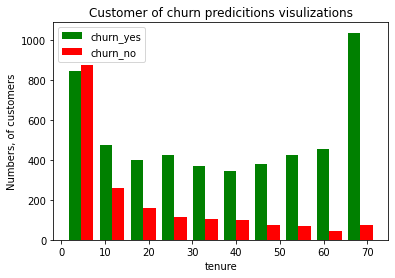

In [189]:
plt.hist([tenure_churn_no, tenure_churn_Yes], color=['green', 'red'],label=['churn_yes', 'churn_no'])
plt.xlabel("tenure")
plt.ylabel("Numbers, of customers")
plt.title("Customer of churn predicitions visulizations")
#color=['green', 'red']
#label=['churn_yes', 'churn_no']
plt.legend()

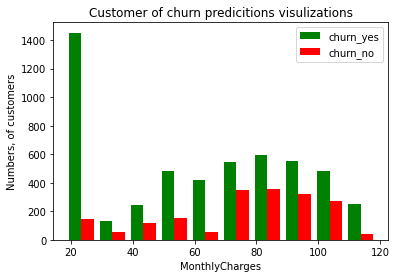

In [190]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_Yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([mc_churn_no, mc_churn_Yes], color=['green', 'red'],label=['churn_yes', 'churn_no'])
plt.xlabel("MonthlyCharges")
plt.ylabel("Numbers, of customers")
plt.title("Customer of churn predicitions visulizations")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 120]
#color=['green', 'red']
#label=['churn_yes', 'churn_no']
plt.legend()

In [191]:
for column in df:
  print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [192]:
for column in df:
  print(df[column].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [193]:
for column in df:
  print(f'{column} :{df[column].unique()}')

gender :['Female' 'Male']
SeniorCitizen :[0 1]
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
tenure :[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

In [194]:
for column in df:
  if df[column].dtypes=='object':
      print(f'{column} :{df[column].unique()}')

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges :['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn :['No' 'Yes']


In [195]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
       print(f'{column} :{df[column].unique()}')

In [196]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [197]:
df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [198]:
print_unique_col_values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [199]:
yes_no_coloumns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','DeviceProtection',
                   'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for cols in yes_no_coloumns:
  df1[cols].replace({'Yes':1, 'No':0},inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [200]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [201]:
df1['gender'].replace({'Female':1, 'Male':0},inplace=True)

In [202]:
df1['gender'].unique()

array([1, 0])

In [203]:
df2=pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [204]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3949,1,0,0,1,18,1,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
342,1,0,1,1,66,1,1,1,1,1,...,1,0,0,1,0,0,1,0,0,0
2102,0,0,0,1,18,1,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0
6324,1,0,1,1,9,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1743,0,0,1,0,67,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [205]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [206]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])


In [207]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
944,1,0,1,1,0.746479,1,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0
5088,1,0,1,1,0.788732,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4356,1,0,0,0,0.028169,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6375,1,0,0,0,0.000000,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [208]:
x = df2.drop('Churn',axis ='columns')
y = df2['Churn']

In [209]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=5)

In [210]:
x_train.shape

(5625, 26)

In [211]:
x_test.shape

(1407, 26)

In [212]:
x_train[:50]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [213]:
len(x_train.columns)

26

In [214]:
x_train.shape

(5625, 26)

In [215]:
x_test.shape

(1407, 26)

In [216]:
y_train.shape

(5625,)

In [217]:
y_train[:10]

5664    1
101     0
2621    0
392     0
1327    1
3607    0
2773    0
1936    0
5387    0
4331    0
Name: Churn, dtype: int64

In [218]:
y_test.shape

(1407,)

In [219]:
print(y_train.shape)

(5625,)


In [220]:
y_train.value_counts()

0    4164
1    1461
Name: Churn, dtype: int64

In [221]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [222]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
    

])

model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5296 - accuracy: 0.7227
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4346 - accuracy: 0.7890
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.7991
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.8021
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8052
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.8057
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8078
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8100
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8048
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4086 - accura

In [223]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.7854


[0.45099008083343506, 0.7853589057922363]

In [224]:
yp = model.predict(x_test)
yp[:5]

array([[0.36964858],
       [0.5834211 ],
       [0.01768816],
       [0.8334929 ],
       [0.50101376]], dtype=float32)

In [225]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [226]:
y_pred = []
for element in yp:
  if element >0.5:
    y_pred.append(1)
  else:
      y_pred.append(0)


In [227]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [228]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       999
           1       0.64      0.59      0.61       408

    accuracy                           0.79      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Truth')

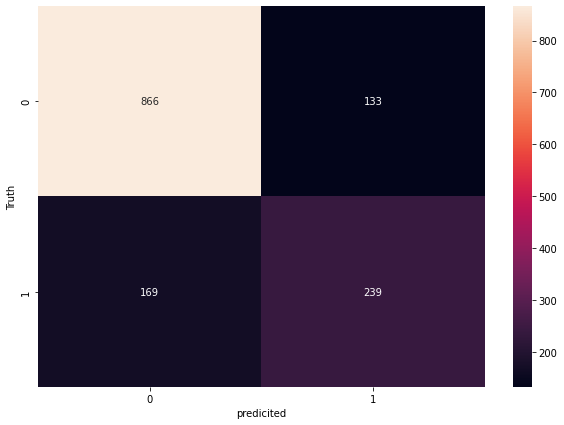

In [229]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicited')
plt.ylabel('Truth')

# Apply Method for handling imblanced dataset 

In [230]:
!pip install -q -U tensorflow-addons

In [231]:
from tensorflow_addons import losses

In [232]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [233]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([
      keras.layers.Dense(26, input_dim=26, activation='relu'),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights ==-1:
       model.fit(x_train, y_train, epochs=100)
    else:
       model.fit(x_train, y_train, epochs=100, class_weight=weights)

    print(model.evaluate(x_test, y_test))

    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)

    print("Classification Report :\n", classification_report(y_test, y_preds))
    return y_preds


In [234]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4821 - accuracy: 0.7659
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4258 - accuracy: 0.7945
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4183 - accuracy: 0.7988
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8030
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8066
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8094
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4056 - accuracy: 0.8114
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8128
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.8149
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4011 - accura

#Apply undersampling

In [235]:
#count class
count_class_0, count_class_1 = df1.Churn.value_counts()
#divide class

df_class_0= df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [236]:
df_class_0.shape

(5163, 27)

In [237]:
df_class_1.shape

(1869, 27)

In [238]:
count_class_0, count_class_1

(5163, 1869)

In [239]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6400,1,0,0,0,1.00000,1,1,1,1,0,...,1,0,0,0,0,1,1,0,0,0
5893,0,0,1,1,0.15493,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [240]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [241]:
df_class_0_under =  df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.shape

(3738, 27)

In [242]:
print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [245]:
X = df_test_under.drop('Churn', axis='columns')
Y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=15, stratify=Y)#stratify:- balance sample

In [246]:
Y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [247]:
y_preds = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 3s 5ms/step - loss: 0.6250 - accuracy: 0.6763
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5140 - accuracy: 0.7589
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4932 - accuracy: 0.7632
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4861 - accuracy: 0.7716
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4827 - accuracy: 0.7696
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4808 - accuracy: 0.7739
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4766 - accuracy: 0.7729
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4772 - accuracy: 0.7706
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4729 - accuracy: 0.7749
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4717 - accuracy: 0.7726
Epoch 11/

In [248]:
#over_sampleing

In [249]:
count_class_0, count_class_1

(5163, 1869)

In [250]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(5163, 27)

In [251]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print('Random over-sampleing:')
print(df_test_over.Churn.value_counts())

Random over-sampleing:
0    5163
1    5163
Name: Churn, dtype: int64


In [252]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15, stratify=y)#stratify:- balance sample

In [253]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [254]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [255]:
y_preds = ANN(X_train,y_train ,X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 4s 5ms/step - loss: 0.5351 - accuracy: 0.7367
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4918 - accuracy: 0.7590
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4845 - accuracy: 0.7590
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4824 - accuracy: 0.7619
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4788 - accuracy: 0.7619
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4752 - accuracy: 0.7637
Epoch 7/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4741 - accuracy: 0.7630
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4703 - accuracy: 0.7679
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4680 - accuracy: 0.7678
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4652 - accura

In [256]:
#SMOTE

In [257]:
!pip install -U imbalanced-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [274]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [275]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [280]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')


In [281]:
X_sm, y_sm = smote.fit_resample(X,y)

In [282]:
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [285]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [286]:
y_preds = ANN(X_train,y_train ,X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5269 - accuracy: 0.7425
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4689 - accuracy: 0.7785
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4582 - accuracy: 0.7835
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4524 - accuracy: 0.7855
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4478 - accuracy: 0.7910
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4437 - accuracy: 0.7906
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4388 - accuracy: 0.7935
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4343 - accuracy: 0.7962
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.7993
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4276 - accura

In [287]:
#use for Ensemble with undersampling
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [289]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [291]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, stratify=y)

In [292]:
y_train.value_counts()

0    3872
1    1402
Name: Churn, dtype: int64

In [293]:
3872/3

1290.6666666666667

In [294]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [296]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [297]:
df3_class0.shape, df3_class1.shape

((3872, 27), (1402, 27))

In [300]:
df3_class0[:1402].shape

(1402, 27)

In [302]:
df_train = pd.concat([df3_class0[:1402], df3_class1], axis=0)
df_train.shape

(2804, 27)

In [303]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

  X_train = df_train.drop('Churn', axis='columns')
  y_train = df_train.Churn

  return X_train, y_train


In [304]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1402)
X_train.shape

(2804, 26)

In [305]:
y_train.shape

(2804,)

In [306]:
y_preds1 = ANN(X_train,y_train ,X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
88/88 [==============================] - 1s 5ms/step - loss: 0.6413 - accuracy: 0.6665
Epoch 2/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5351 - accuracy: 0.7475
Epoch 3/100
88/88 [==============================] - 0s 4ms/step - loss: 0.5059 - accuracy: 0.7571
Epoch 4/100
88/88 [==============================] - 0s 4ms/step - loss: 0.4950 - accuracy: 0.7618
Epoch 5/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4889 - accuracy: 0.7632
Epoch 6/100
88/88 [==============================] - 0s 4ms/step - loss: 0.4848 - accuracy: 0.7660
Epoch 7/100
88/88 [==============================] - 0s 4ms/step - loss: 0.4812 - accuracy: 0.7693
Epoch 8/100
88/88 [==============================] - 0s 4ms/step - loss: 0.4785 - accuracy: 0.7703
Epoch 9/100
88/88 [==============================] - 0s 3ms/step - loss: 0.4750 - accuracy: 0.7728
Epoch 10/100
88/88 [==============================] - 0s 4ms/step - loss: 0.4740 - accuracy: 0.7743
Epoch 11/

In [312]:
y_pred_final = y_preds1.copy()



In [317]:
for i in range(len(y_preds1)):
  n_ones = y_preds1[i] + y_preds12[i] + y_preds3[i]
  if n_ones>1:
    y_pred_final = 1
  else:
    y_pred_final = 0


NameError: ignored

In [316]:
print(classification_report(y_test, y_pred_final))

TypeError: ignored